# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **[Wen]**  <br/>
Firstname: **[Wen]**    <br/>
Student ID: **[31514081]**    <br/>
Email: **[wwen0009@student.monash.edu]**    <br/>
Your tutorial time: **[FIT3181 Laboratory 01_OnCampus: Thursday 10:00-12:00 ]**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 18 September 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 6. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebook. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).** 

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Install the package `imutils` if you have not installed yet

In [23]:
# ! pip install imutils

In [24]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [25]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [26]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [27]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [28]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [29]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [30]:
network1.build_cnn()
network1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [31]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 3s 47ms/step - loss: 2.3063 - accuracy: 0.1093 - val_loss: 2.3076 - val_accuracy: 0.0940
Epoch 2/20
63/63 [==============================] - 3s 46ms/step - loss: 2.2883 - accuracy: 0.1353 - val_loss: 2.3072 - val_accuracy: 0.0800
Epoch 3/20
63/63 [==============================] - 3s 47ms/step - loss: 2.2951 - accuracy: 0.1217 - val_loss: 2.2354 - val_accuracy: 0.1420
Epoch 4/20
63/63 [==============================] - 3s 46ms/step - loss: 2.2912 - accuracy: 0.1340 - val_loss: 2.3120 - val_accuracy: 0.0800
Epoch 5/20
63/63 [==============================] - 3s 47ms/step - loss: 2.2983 - accuracy: 0.1098 - val_loss: 2.3108 - val_accuracy: 0.0800
Epoch 6/20
63/63 [==============================] - 3s 47ms/step - loss: 2.3052 - accuracy: 0.1035 - val_loss: 2.3094 - val_accuracy: 0.0800
Epoch 7/20
63/63 [==============================] - 3s 46ms/step - loss: 2.3041 - accuracy: 0.0895 - val_loss: 2.2920 - val_accuracy: 0.1380
Epoch 8/20
63

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [32]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 9ms/step - loss: 2.0236 - accuracy: 0.2660


0.26600000262260437

Below shows how you can inspect the training progress.

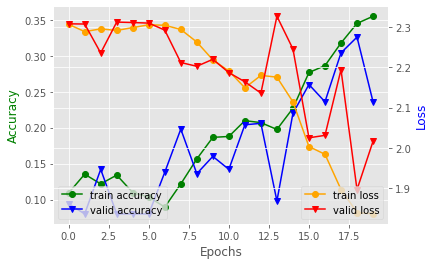

In [33]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [34]:
network1.predict(data_manager.X_test[0:10])

array([9, 2, 2, 2, 9, 2, 2, 9, 1, 2], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

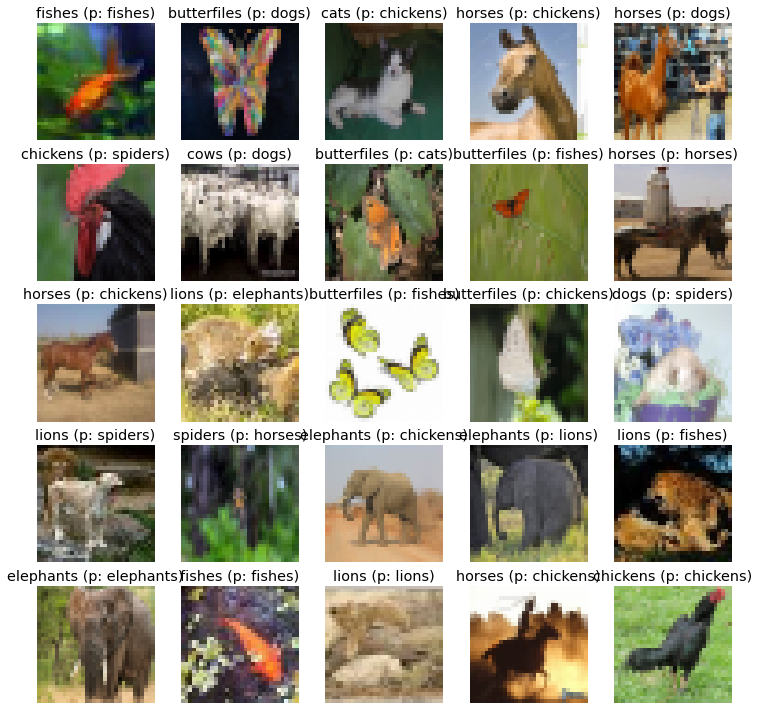

In [35]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*#Your answer and observation here*


The learning impact of our model is not very good, based on the output of the training model and the accuracy and loss curves. 
The learning rate of the model is set at 0.5, which is obviously too high for the deep learning model. 
By lowering the learning rate, we may enhance the model.         

**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
from keras.layers import Input, Dense, Add   

In [37]:
tf.random.set_seed(1234)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [38]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
            #Insert your code here
            def conv(x, filters):
                return layers.Conv2D(filters,(3,3),padding='same')(x)
            def bn(x):
                return layers.BatchNormalization(momentum=0.9)(x)
            P=Input(shape=(32, 32, 3))
            for i in range(self.num_blocks):
                if i==0:
                    M=conv(P,self.feature_maps[i])
                    x=conv(P,self.feature_maps[i])
                else:
                    M=conv(M,self.feature_maps[i])
                    x=conv(M,self.feature_maps[i])
                if self.batch_norm:
                    M=bn(M)
                    M=layers.Activation(self.activation_func)(M)
                    M=conv(M,self.feature_maps[i])
                    y=bn(M)
                    M=bn(M)
                    if self.use_skip:
                        x=layers.Add()([x, y])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
                if not self.batch_norm:
                    z=conv(M,self.feature_maps[i])
                    if self.use_skip:
                        x=layers.Add()([x, z])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
            M=layers.Flatten()(M)
            M=layers.Dense(self.num_classes, activation='softmax')(M)
            self.model=M
            self.model=tf.keras.Model(P,M)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            

<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

#*Write your report and observation here*

Using skip connection can improve the testing accuracy but for both using and not using the training accuray is much higher than the testing accuracy, so they are both overfitting.




In [39]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [40]:
our_network_skip.fit(data_manager, batch_size=32, num_epochs=20)
our_network_skip.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 8s 64ms/step - loss: 1.8895 - accuracy: 0.3355 - val_loss: 1.6647 - val_accuracy: 0.4020
Epoch 2/20
125/125 [==============================] - 8s 63ms/step - loss: 1.5162 - accuracy: 0.4760 - val_loss: 1.4059 - val_accuracy: 0.5200
Epoch 3/20
125/125 [==============================] - 8s 64ms/step - loss: 1.2615 - accuracy: 0.5552 - val_loss: 1.2284 - val_accuracy: 0.5640
Epoch 4/20
125/125 [==============================] - 8s 64ms/step - loss: 1.0381 - accuracy: 0.6515 - val_loss: 1.7565 - val_accuracy: 0.4700
Epoch 5/20
125/125 [==============================] - 8s 64ms/step - loss: 0.8688 - accuracy: 0.7028 - val_loss: 1.2549 - val_accuracy: 0.5780
Epoch 6/20
125/125 [==============================] - 8s 64ms/step - loss: 0.7046 - accuracy: 0.7613 - val_loss: 1.2357 - val_accuracy: 0.5800
Epoch 7/20
125/125 [==============================] - 8s 64ms/step - loss: 0.5389 - accuracy: 0.8145 - val_loss: 1.2448 - val_accuracy: 0.6120

0.593999981880188

In [41]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)       

In [42]:
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)
our_network_no_skip.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 22s 174ms/step - loss: 18.0342 - accuracy: 0.2397 - val_loss: 20.9955 - val_accuracy: 0.2100
Epoch 2/20
125/125 [==============================] - 23s 182ms/step - loss: 16.1415 - accuracy: 0.3055 - val_loss: 18.3605 - val_accuracy: 0.3360
Epoch 3/20
125/125 [==============================] - 21s 171ms/step - loss: 16.9326 - accuracy: 0.3465 - val_loss: 11.4038 - val_accuracy: 0.3520
Epoch 4/20
125/125 [==============================] - 21s 169ms/step - loss: 13.7742 - accuracy: 0.3865 - val_loss: 11.3959 - val_accuracy: 0.3100
Epoch 5/20
125/125 [==============================] - 21s 169ms/step - loss: 11.5673 - accuracy: 0.4462 - val_loss: 9.9719 - val_accuracy: 0.3800
Epoch 6/20
125/125 [==============================] - 21s 170ms/step - loss: 9.6554 - accuracy: 0.4615 - val_loss: 19.4008 - val_accuracy: 0.3660
Epoch 7/20
125/125 [==============================] - 21s 170ms/step - loss: 8.4435 - accuracy: 0.4837 - val_loss: 7.120

0.4560000002384186

<span style="color:red">**Question 3.4**</span> **Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Report the best parameters and the testing accuracy here*

The best model will be num_block=3, use_skip=Ture, learning rate=0.001

In [44]:
#Insert your code here. You can add more cells if necessary
best_val_accuracy = 0
best_hparam = None

for num_block in [2,3,4]:
    for use_skip in [True,False]:
        for learning_rate in [0.001,0.0001]:
            Model= YourModel(name='network1',
                                 feature_maps=32,
                                 num_classes=len(data_manager.classes),
                                 num_blocks=num_block,
                                 drop_rate= 0.0, 
                                 batch_norm=True, 
                                 use_skip = use_skip,
                                 optimizer='adam',
                                 verbose = False,
                                 learning_rate= learning_rate)
            Model.build_cnn()
            Model.fit(data_manager, batch_size=32, num_epochs=20)
            val_accuracy:float=Model.compute_accuracy(data_manager.X_test, data_manager.y_test)
            if val_accuracy>best_val_accuracy:
                best_val_accuracy=val_accuracy
                best_hparam=[num_block,use_skip,learning_rate]
print(best_hparam)

8/8 [==============================] - 1s 145ms/step - loss: 5.4548 - accuracy: 0.4280
[2, True, 0.0001]


<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [66]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
            #Insert your code here
            def conv(x, filters):
                return layers.Conv2D(filters,(3,3),padding='same')(x)
            def bn(x):
                return layers.BatchNormalization(momentum=0.9)(x)
            P=Input(shape=(32, 32, 3))
            for i in range(self.num_blocks):
                if i==0:
                    M=conv(P,self.feature_maps[i])
                    x=conv(P,self.feature_maps[i])
                else:
                    M=conv(M,self.feature_maps[i])
                    x=conv(M,self.feature_maps[i])
                if self.batch_norm:
                    M=bn(M)
                    M=layers.Activation(self.activation_func)(M)
                    M=conv(M,self.feature_maps[i])
                    y=bn(M)
                    M=bn(M)
                    if self.use_skip:
                        x=layers.Add()([x, y])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
                if not self.batch_norm:
                    z=conv(M,self.feature_maps[i])
                    if self.use_skip:
                        x=layers.Add()([x, z])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
            M=layers.Flatten()(M)
            M=layers.Dense(self.num_classes, activation='softmax')(M)
            self.model=M
            self.model=tf.keras.Model(P,M)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='auto')
        callbacks = [early_checkpoint]
        if self.is_augmentation == True: 
            datagen = ImageDataGenerator(horizontal_flip=True,
                                         width_shift_range=0.1,height_shift_range=0.1,rotation_range=5,shear_range=0.1,zoom_range=0.1,fill_mode="nearest")
            batch_size = self.batch_size if batch_size is None else batch_size
            num_epochs = self.num_epochs if num_epochs is None else num_epochs
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(datagen.flow(x = data_manager.X_train, 
                                                       y = data_manager.y_train, 
                                                       batch_size = batch_size), validation_data=datagen.flow(data_manager.X_valid, data_manager.y_valid,
                                                                       batch_size=batch_size),
                                                       epochs = num_epochs, 
                                                       verbose= self.verbose,
                                                       callbacks = callbacks)
        else:
            batch_size = self.batch_size if batch_size is None else batch_size
            num_epochs = self.num_epochs if num_epochs is None else num_epochs
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid),
                                          epochs = num_epochs, batch_size = batch_size, verbose= self.verbose,callbacks = callbacks)

<span style="color:red">**Question 3.6**</span> **Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

while using data augmentation, the accuracy of the model will be better than no using it.

In [67]:
#Insert your code here. You can add more cells if necessary
#Insert your code here. You can add more cells if necessary
Model_2 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     is_augmentation = True,
                     optimizer='nadam',
                     learning_rate= 0.0001)
Model_2.build_cnn()
Model_2.fit(data_manager, batch_size=32, num_epochs=20)
Model_2.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 7s 53ms/step - loss: 2.1196 - accuracy: 0.2512 - val_loss: 1.8343 - val_accuracy: 0.3540
Epoch 2/20
125/125 [==============================] - 7s 52ms/step - loss: 1.7806 - accuracy: 0.3725 - val_loss: 1.6925 - val_accuracy: 0.4180
Epoch 3/20
125/125 [==============================] - 6s 51ms/step - loss: 1.6717 - accuracy: 0.4170 - val_loss: 1.5961 - val_accuracy: 0.4460
Epoch 4/20
125/125 [==============================] - 7s 52ms/step - loss: 1.5864 - accuracy: 0.4605 - val_loss: 1.5658 - val_accuracy: 0.4680
Epoch 5/20
125/125 [==============================] - 7s 53ms/step - loss: 1.5262 - accuracy: 0.4733 - val_loss: 1.5118 - val_accuracy: 0.4980
Epoch 6/20
125/125 [==============================] - 6s 51ms/step - loss: 1.4654 - accuracy: 0.4938 - val_loss: 1.4807 - val_accuracy: 0.5280
Epoch 7/20
125/125 [==============================] - 7s 52ms/step - loss: 1.4174 - accuracy: 0.5105 - val_loss: 1.4460 - val_accuracy: 0.5280

0.5220000147819519

In [68]:
Model_2 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     is_augmentation = False,
                     optimizer='nadam',
                     learning_rate= 0.0001)
Model_2.build_cnn()
Model_2.fit(data_manager, batch_size=32, num_epochs=20)
Model_2.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 6s 51ms/step - loss: 2.0778 - accuracy: 0.2710 - val_loss: 1.7875 - val_accuracy: 0.3820
Epoch 2/20
125/125 [==============================] - 6s 49ms/step - loss: 1.6772 - accuracy: 0.4220 - val_loss: 1.6315 - val_accuracy: 0.4460
Epoch 3/20
125/125 [==============================] - 6s 49ms/step - loss: 1.4978 - accuracy: 0.4900 - val_loss: 1.5660 - val_accuracy: 0.4720
Epoch 4/20
125/125 [==============================] - 6s 48ms/step - loss: 1.3753 - accuracy: 0.5360 - val_loss: 1.5379 - val_accuracy: 0.4880
Epoch 5/20
125/125 [==============================] - 6s 49ms/step - loss: 1.2642 - accuracy: 0.5788 - val_loss: 1.4576 - val_accuracy: 0.5220
Epoch 6/20
125/125 [==============================] - 6s 48ms/step - loss: 1.1685 - accuracy: 0.6133 - val_loss: 1.4236 - val_accuracy: 0.5420
Epoch 7/20
125/125 [==============================] - 6s 49ms/step - loss: 1.0826 - accuracy: 0.6403 - val_loss: 1.3811 - val_accuracy: 0.5200

0.5839999914169312

<span style="color:red">**Question 3.7**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

#*Write your answer and observation here*

The mixup Technique improve the accuracy of the model.


In [69]:
#Insert your code here. You can add more cells if necessary
#Insert your code here. You can add more cells if necessary
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)


In [70]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
            #Insert your code here
            def conv(x, filters):
                return layers.Conv2D(filters,(3,3),padding='same')(x)
            def bn(x):
                return layers.BatchNormalization(momentum=0.9)(x)
            P=Input(shape=(32, 32, 3))
            for i in range(self.num_blocks):
                if i==0:
                    M=conv(P,self.feature_maps[i])
                    x=conv(P,self.feature_maps[i])
                else:
                    M=conv(M,self.feature_maps[i])
                    x=conv(M,self.feature_maps[i])
                if self.batch_norm:
                    M=bn(M)
                    M=layers.Activation(self.activation_func)(M)
                    M=conv(M,self.feature_maps[i])
                    y=bn(M)
                    M=bn(M)
                    if self.use_skip:
                        x=layers.Add()([x, y])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
                if not self.batch_norm:
                    z=conv(M,self.feature_maps[i])
                    if self.use_skip:
                        x=layers.Add()([x, z])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
            M=layers.Flatten()(M)
            M=layers.Dense(self.num_classes, activation='softmax')(M)
            self.model=M
            self.model=tf.keras.Model(P,M)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        y_train = tf.one_hot(data_manager.y_train, 10) 
        y_valid = tf.one_hot(data_manager.y_valid, 10) 
        y_test = tf.one_hot(data_manager.y_test, 10) 
        x_train = data_manager.X_train.astype('float32')
        x_valid = data_manager.X_valid.astype('float32')

        train_ds_one = (
            tf.data.Dataset.from_tensor_slices((x_train, y_train))
            .shuffle(batch_size * 100)
            .batch(batch_size)
        )
        train_ds_two = (
            tf.data.Dataset.from_tensor_slices((x_train, y_train))
            .shuffle(batch_size * 100)
            .batch(batch_size)
        )
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='auto')
        callbacks = [early_checkpoint]
        if self.is_augmentation == True: 
            datagen = ImageDataGenerator(horizontal_flip=True,
                                         width_shift_range=0.1,height_shift_range=0.1,rotation_range=5,shear_range=0.1,zoom_range=0.1,fill_mode="nearest")
            batch_size = self.batch_size if batch_size is None else batch_size
            num_epochs = self.num_epochs if num_epochs is None else num_epochs
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(datagen.flow(x = data_manager.X_train, 
                                                       y = data_manager.y_train, 
                                                       batch_size = batch_size), validation_data=datagen.flow(data_manager.X_valid, data_manager.y_valid,
                                                                       batch_size=batch_size),
                                                       epochs = num_epochs, 
                                                       verbose= self.verbose,
                                                       callbacks = callbacks)
        

In [74]:
Model_2 = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     is_augmentation = True,
                     optimizer='nadam',
                     learning_rate= 0.0001)
Model_2.build_cnn()
Model_2.fit(data_manager, batch_size=32, num_epochs=20)
Model_2.compute_accuracy(data_manager.X_test, data_manager.y_test)

Epoch 1/20
125/125 [==============================] - 6s 49ms/step - loss: 2.0778 - accuracy: 0.2710 - val_loss: 1.7875 - val_accuracy: 0.3820
Epoch 2/20
125/125 [==============================] - 6s 48ms/step - loss: 1.6772 - accuracy: 0.4220 - val_loss: 1.6315 - val_accuracy: 0.4460
Epoch 3/20
125/125 [==============================] - 6s 48ms/step - loss: 1.4978 - accuracy: 0.4900 - val_loss: 1.5660 - val_accuracy: 0.4720
Epoch 4/20
125/125 [==============================] - 6s 48ms/step - loss: 1.3753 - accuracy: 0.5360 - val_loss: 1.5379 - val_accuracy: 0.4880
Epoch 5/20
125/125 [==============================] - 6s 48ms/step - loss: 1.2642 - accuracy: 0.5788 - val_loss: 1.4576 - val_accuracy: 0.5220
Epoch 6/20
125/125 [==============================] - 6s 49ms/step - loss: 1.1685 - accuracy: 0.6133 - val_loss: 1.4236 - val_accuracy: 0.5420
Epoch 7/20
125/125 [==============================] - 6s 49ms/step - loss: 1.0826 - accuracy: 0.6403 - val_loss: 1.3811 - val_accuracy: 0.5200

0.6119999885559082

<span style="color:red">**Question 3.8**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [53]:

pip install cleverhans


     ---------------------------------------- 92.3/92.3 kB ? eta 0:00:00
     ---------------------------------------- 154.7/154.7 kB ? eta 0:00:00
     ---------------------------------------- 41.5/41.5 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 6.6/6.6 MB 24.9 MB/s eta 0:00:00
     ---------------------------------------- 91.0/91.0 kB ? eta 0:00:00
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6360 sha256=15660275f988e0badbddc25c68c535d1cb2711ec6a1276cb1d84c387cc625c46
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d3\e0\e9\305e348717e399665119bd012510d51ff4f22d709ff60c3096
Successfully built easydict
Note: you may need to restart the kernel to use updated packages.


In [75]:
#Insert your code here. You can add more cells if necessary
def plot_prediction1(model, X, y, classes, tile_shape=(5, 5)):
        y_pred = model.predict(X)
        plt.clf()
        fig, ax = plt.subplots(tile_shape[0], tile_shape[1], figsize=(2.5 * tile_shape[1], 2.5 * tile_shape[0]))
#         idx = np.random.choice(len(y_pred), tile_shape[0] * tile_shape[1])
        idx = np.arange(tile_shape[0] * tile_shape[1])

        for i in range(tile_shape[0]):
            for j in range(tile_shape[1]):
                ax[i, j].imshow((X[idx[i * tile_shape[1] + j]] + 1.0) / 2)
                ax[i, j].set_title('{} (p: {})'.format(classes[y[idx[i * tile_shape[1] + j]]],
                                                       classes[y_pred[idx[i * tile_shape[1] + j]]]))
                ax[i, j].grid(False)
                ax[i, j].axis('off')
        plt.show()

In [76]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
            #Insert your code here
            def conv(x, filters):
                return layers.Conv2D(filters,(3,3),padding='same')(x)
            def bn(x):
                return layers.BatchNormalization(momentum=0.9)(x)
            P=Input(shape=(32, 32, 3))
            for i in range(self.num_blocks):
                if i==0:
                    M=conv(P,self.feature_maps[i])
                    x=conv(P,self.feature_maps[i])
                else:
                    M=conv(M,self.feature_maps[i])
                    x=conv(M,self.feature_maps[i])
                if self.batch_norm:
                    M=bn(M)
                    M=layers.Activation(self.activation_func)(M)
                    M=conv(M,self.feature_maps[i])
                    y=bn(M)
                    M=bn(M)
                    if self.use_skip:
                        x=layers.Add()([x, y])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
                if not self.batch_norm:
                    z=conv(M,self.feature_maps[i])
                    if self.use_skip:
                        x=layers.Add()([x, z])
                        M=layers.Activation(self.activation_func)(x)
                        M=layers.AveragePooling2D(pool_size=(2, 2), padding='same')(M)
                        M=layers.Dropout(rate=self.drop_rate)(M)
            M=layers.Flatten()(M)
            M=layers.Dense(self.num_classes, activation='softmax')(M)
            self.model=M
            self.model=tf.keras.Model(P,M)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            

In [77]:
model = tf.keras.Model(Model_2.model.input,Model_2.model.layers[-2].output)
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent
from cleverhans.tf2.attacks.momentum_iterative_method import momentum_iterative_method
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import cleverhans

In [78]:
x_test = data_manager.X_test
y_test = data_manager.y_test

# for PGD
# compute accuracy for attacked image
print("The accuracy after PGD attack:")
x_test_pgd = projected_gradient_descent(model, x_test, 0.0313, 0.002, 20, np.inf)
# predict_x = batch_norm_network.predict(x_test_pgd)
Model_2.compute_accuracy(x_test_pgd, y_test)
# acc=accuracy_score(y_test,predict_x)

The accuracy after PGD attack:
8/8 [==============================] - 0s 13ms/step - loss: 1.3220 - accuracy: 0.6100


0.6100000143051147

<Figure size 432x288 with 0 Axes>

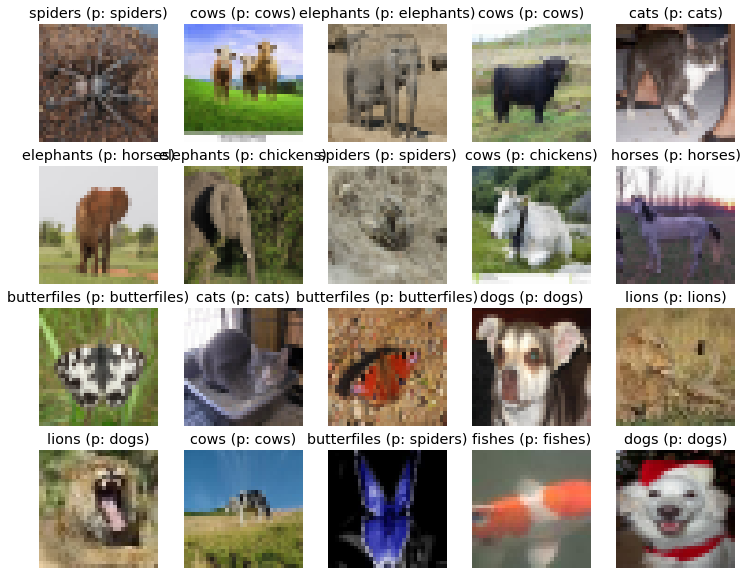

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

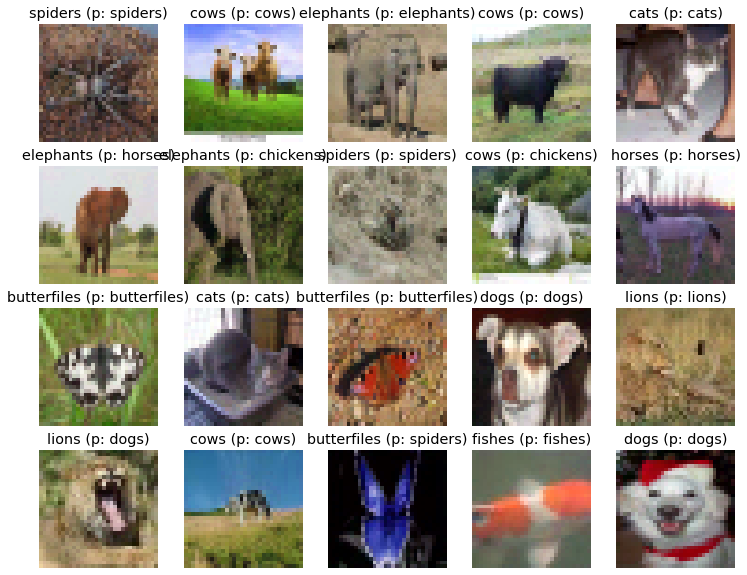

In [79]:
plot_prediction1(Model_2,x_test,y_test, data_manager.classes,(4,5))
plot_prediction1(Model_2,x_test_pgd,y_test, data_manager.classes,(4,5))

In [80]:
# for FGSM
# compute accuracy for attacked image
x_test_fgsm = fast_gradient_method(model, data_manager.X_test, 0.0313, np.inf)
print("Here is the accuracy after FGSM attack")
# predict_x = batch_norm_network.predict(set_x_pgd)
Model_2.compute_accuracy(x_test_fgsm, y_test)
# acc=accuracy_score(data_manager.y_test,predict_x)

Here is the accuracy after FGSM attack
8/8 [==============================] - 0s 13ms/step - loss: 1.3165 - accuracy: 0.6140


0.6140000224113464

<Figure size 432x288 with 0 Axes>

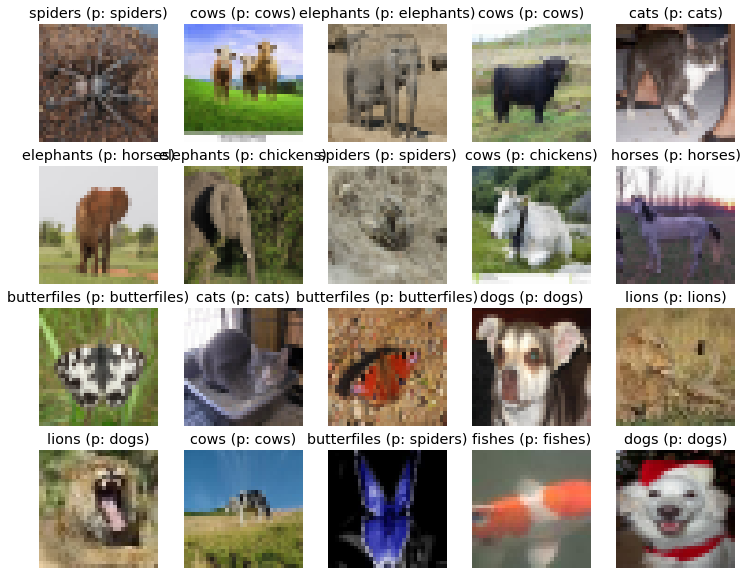

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

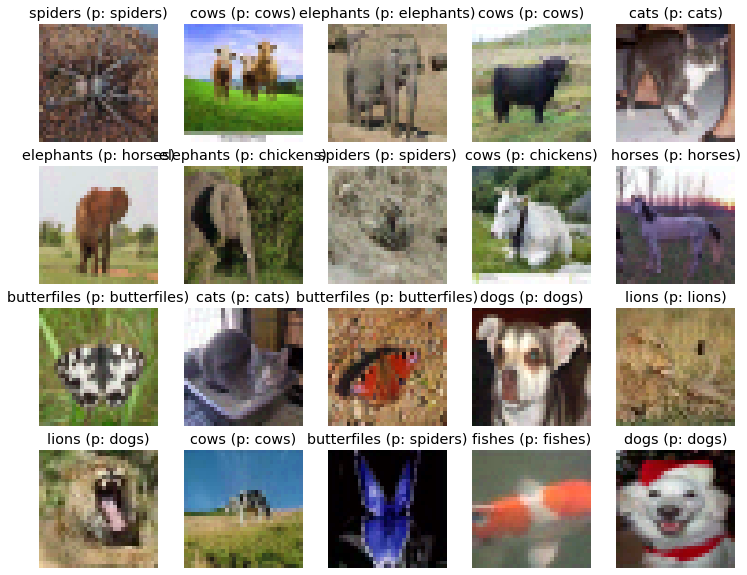

In [81]:
plot_prediction1(Model_2,x_test,y_test, data_manager.classes,(4,5))
plot_prediction1(Model_2,x_test_fgsm,y_test, data_manager.classes,(4,5))

In [82]:
# for MIM
# compute accuracy for attacked image
x_test_mim = momentum_iterative_method(model, data_manager.X_test, 0.0313, np.inf)
print("Here is the accuracy after FGSM attack")
# predict_x = batch_norm_network.predict(set_x_pgd)
Model_2.compute_accuracy(x_test_mim, y_test)
# acc=accuracy_score(data_manager.y_test,predict_x)

Here is the accuracy after FGSM attack
8/8 [==============================] - 0s 13ms/step - loss: 1.3250 - accuracy: 0.6100


0.6100000143051147

<Figure size 432x288 with 0 Axes>

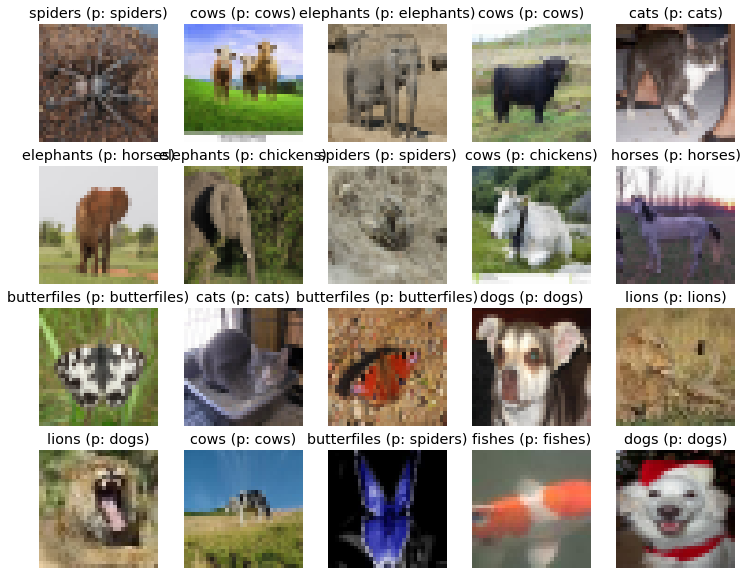

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

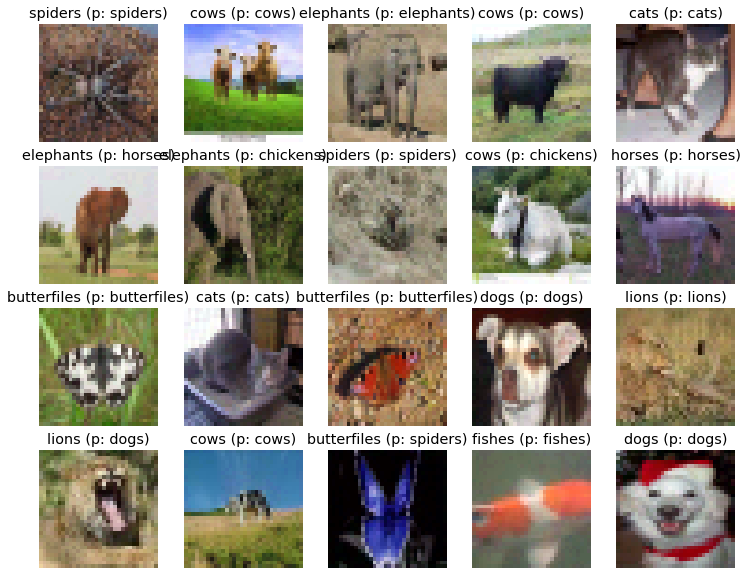

In [83]:
plot_prediction1(Model_2,x_test,y_test, data_manager.classes,(4,5))
plot_prediction1(Model_2,x_test_mim,y_test, data_manager.classes,(4,5))

<span style="color:red">**Question 3.9**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [85]:
#Insert your code here. You can add more cells if necessary
defense_model = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     is_augmentation=True,
                     optimizer='nadam',
                     learning_rate= 0.0001)
defense_model.build_cnn()
model = defense_model.model


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

<span style="color:red">**Question 3.10**</span> (**additionally exploring question**) Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this techique to the best obtained model and report the results. For the purpose of implementating SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary




--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**